## HR Attrition Analysis
The goal of this analysis is to 
- identify key factors contributing to employee attrition within a company.
- provide actionable insights to help HR departments reduce turnover rates. 

#

In [2]:
#packages
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#data loading
data = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Describe columns function
def describe_columns(df):
    for col in df.columns:
        print(f"Column: {col}")
        print(f"  Type: {df[col].dtype}")
        print(f"  Missing values: {df[col].isnull().sum()}")
        distinct_vals = df[col].dropna().unique()
        print(f"  Distinct values: {len(distinct_vals)}")
        examples = ', '.join(map(str, distinct_vals[:5]))
        print(f"  Examples: {examples}")
        print("-" * 40)

# Example usage:
describe_columns(data)

Column: Age
  Type: int64
  Missing values: 0
  Distinct values: 43
  Examples: 41, 49, 37, 33, 27
----------------------------------------
Column: Attrition
  Type: object
  Missing values: 0
  Distinct values: 2
  Examples: Yes, No
----------------------------------------
Column: BusinessTravel
  Type: object
  Missing values: 0
  Distinct values: 3
  Examples: Travel_Rarely, Travel_Frequently, Non-Travel
----------------------------------------
Column: DailyRate
  Type: int64
  Missing values: 0
  Distinct values: 886
  Examples: 1102, 279, 1373, 1392, 591
----------------------------------------
Column: Department
  Type: object
  Missing values: 0
  Distinct values: 3
  Examples: Sales, Research & Development, Human Resources
----------------------------------------
Column: DistanceFromHome
  Type: int64
  Missing values: 0
  Distinct values: 29
  Examples: 1, 8, 2, 3, 24
----------------------------------------
Column: Education
  Type: int64
  Missing values: 0
  Distinct values

### Exploaratory Data Analysis (EDA)

<Figure size 1000x1500 with 0 Axes>

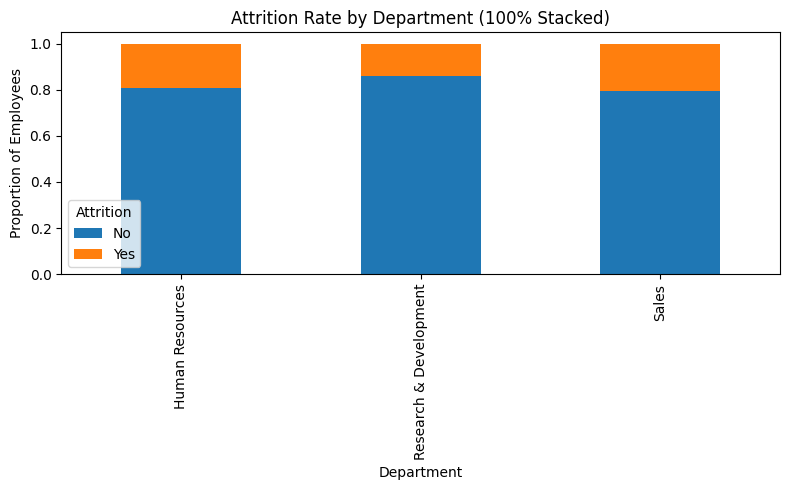

In [11]:
# Attrition Rate by Department (100% Stacked Bar Plot)
plt.figure(figsize=(10,15))
dept_attrition = data.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
dept_attrition_percent = dept_attrition.div(dept_attrition.sum(axis=1), axis=0)
dept_attrition_percent.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Attrition Rate by Department (100% Stacked)')
plt.ylabel('Proportion of Employees')
plt.xlabel('Department')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

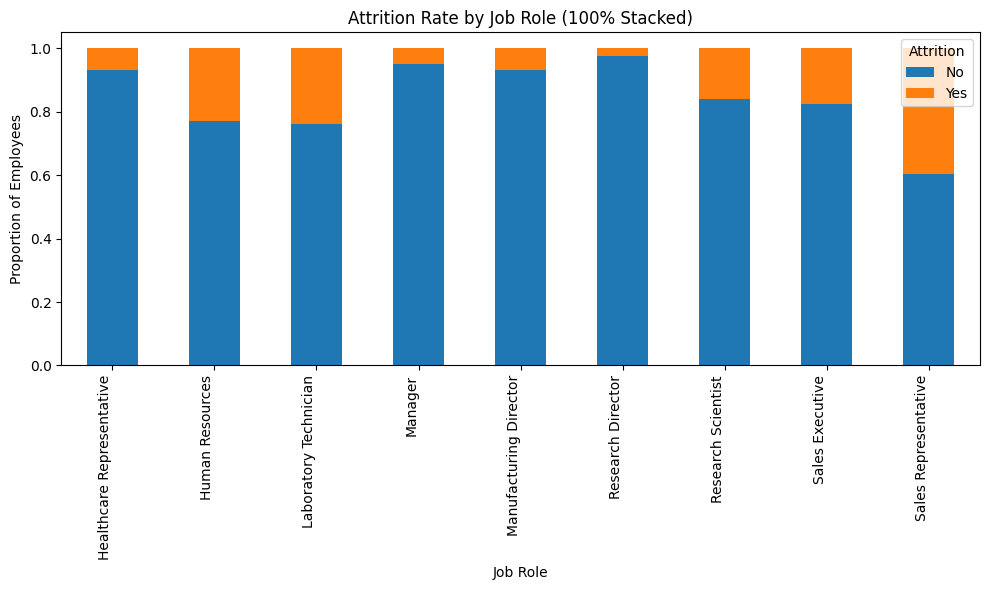

In [12]:
# Attrition Rate by Job Role (100% Stacked Bar Plot)
plt.figure(figsize=(10,6))
role_attrition = data.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
role_attrition_percent = role_attrition.div(role_attrition.sum(axis=1), axis=0)
role_attrition_percent.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Attrition Rate by Job Role (100% Stacked)')
plt.ylabel('Proportion of Employees')
plt.xlabel('Job Role')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

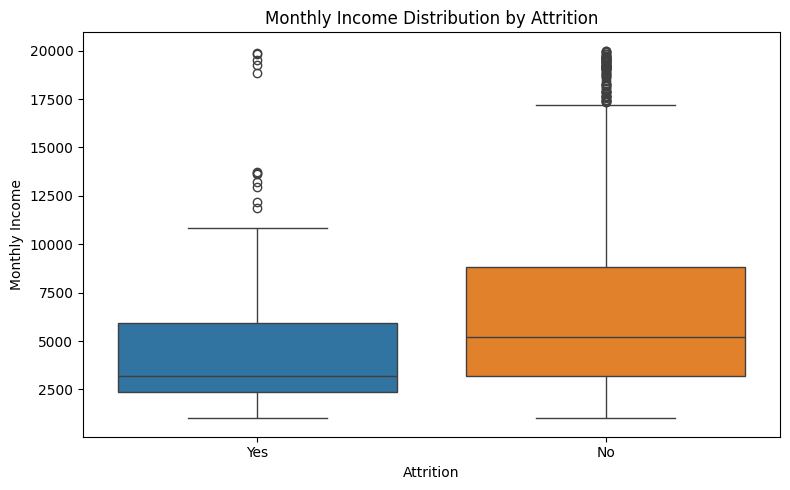

In [13]:
# Monthly Income Distribution by Attrition (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Attrition', y='MonthlyIncome', hue='Attrition')
plt.title('Monthly Income Distribution by Attrition')
plt.ylabel('Monthly Income')
plt.xlabel('Attrition')
plt.tight_layout()
plt.show()

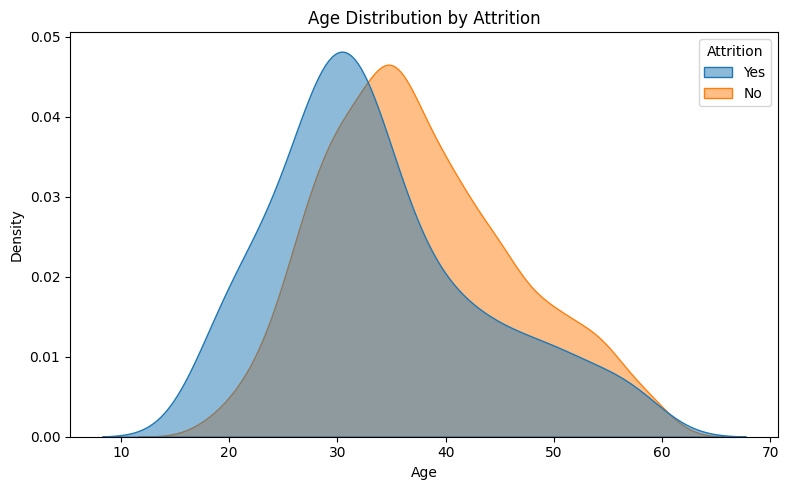

In [14]:
# Age Distribution by Attrition (KDE Plot)
plt.figure(figsize=(8,5))
sns.kdeplot(data=data, x='Age', hue='Attrition', fill=True, common_norm=False, alpha=0.5)
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

<Figure size 900x600 with 0 Axes>

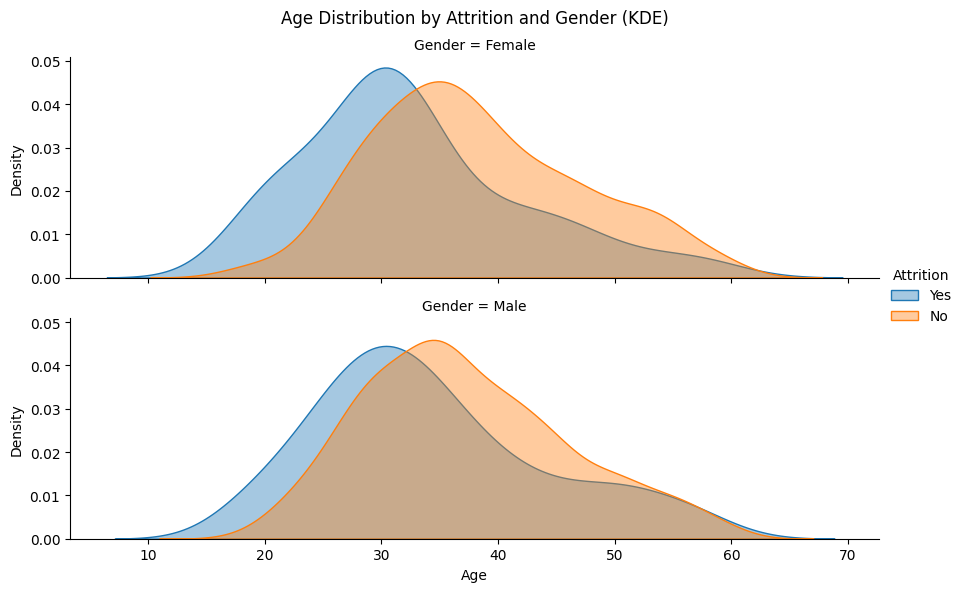

In [18]:
# Age Distribution by Attrition and Gender (KDE Plot, Facet by Gender)
plt.figure(figsize=(9,6))
g = sns.FacetGrid(data, row='Gender', hue='Attrition', aspect=3, height=3, sharex=True, sharey=True)
g.map(sns.kdeplot, 'Age', fill=True, alpha=0.4).add_legend(title='Attrition')
g.set_axis_labels('Age', 'Density')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Age Distribution by Attrition and Gender (KDE)')
plt.show()

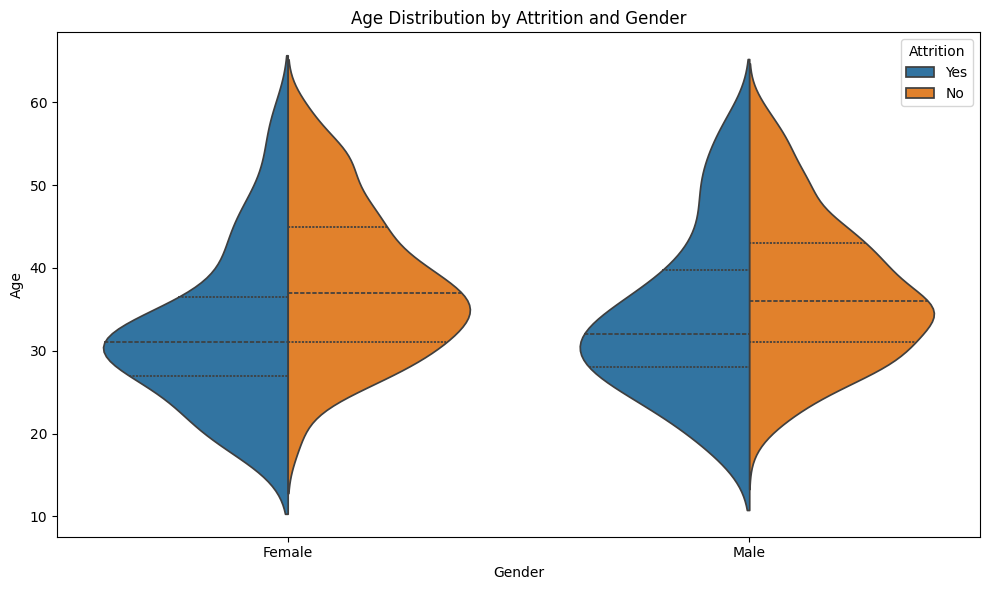

In [15]:
# Age Distribution by Attrition and Gender (Violin Plot)
plt.figure(figsize=(10,6))
sns.violinplot(data=data, x='Gender', y='Age', hue='Attrition', split=True, inner='quartile')
plt.title('Age Distribution by Attrition and Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

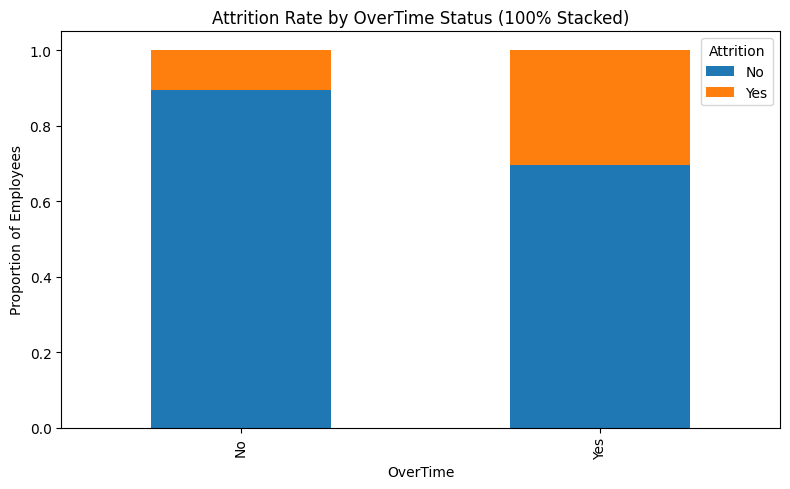

In [16]:
# Attrition Rate by OverTime Status (100% Stacked Bar Plot)
overtime_attrition = data.groupby(['OverTime', 'Attrition']).size().unstack(fill_value=0)
overtime_attrition_percent = overtime_attrition.div(overtime_attrition.sum(axis=1), axis=0)
overtime_attrition_percent.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Attrition Rate by OverTime Status (100% Stacked)')
plt.ylabel('Proportion of Employees')
plt.xlabel('OverTime')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

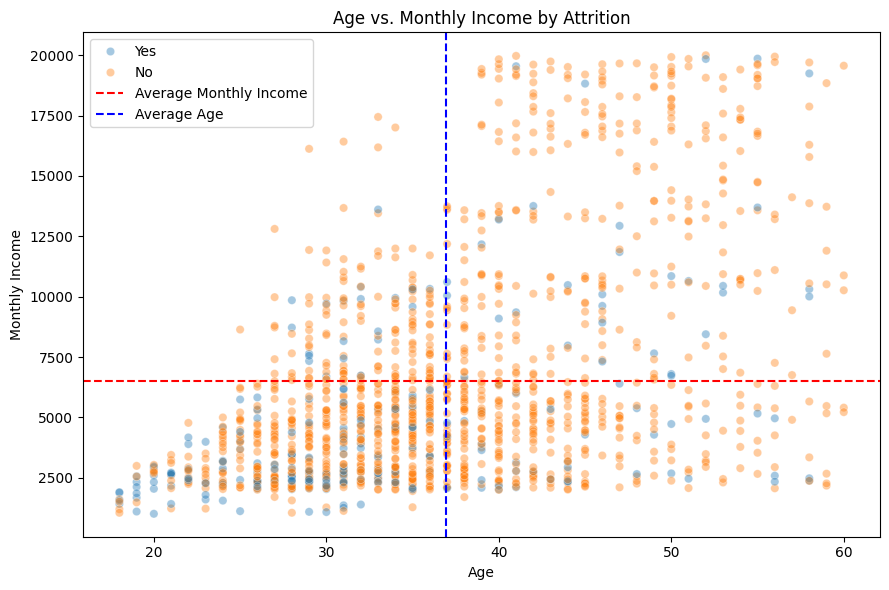

In [17]:
# Scatter: Age vs. Monthly Income, colored by Attrition
plt.figure(figsize=(9,6))
sns.scatterplot(data=data, x='Age',
                y='MonthlyIncome',
                hue='Attrition',
                alpha=0.4)
plt.title('Age vs. Monthly Income by Attrition')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.legend(title='Attrition')
plt.axhline(y=data['MonthlyIncome'].mean(), color='r', linestyle='--', label='Average Monthly Income')
plt.axvline(x=data['Age'].mean(), color='b', linestyle='--', label='Average Age')
plt.legend()
plt.tight_layout()
plt.show()

### Hypotheses to Test

`Hypothesis 1`: Employees who work overtime are more likely to leave.

In [19]:
# Overtime vs. Attrition rate
overtime_attrition_rate = data.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack()
print(overtime_attrition_rate)

Attrition        No       Yes
OverTime                     
No         0.895636  0.104364
Yes        0.694712  0.305288


In [20]:
# Statistical test: Chi-squared test for independence between OverTime and Attrition
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['OverTime'], data['Attrition'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('--------------------------------')
print("Contingency Table:")
print(contingency_table)
print("\nChi-squared Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print("\nInterpretation:")
if p < 0.05:
    print("There is a statistically significant association between OverTime and Attrition (p < 0.05).")
else:
    print("There is no statistically significant association between OverTime and Attrition (p >= 0.05).")

print('\n--------------------------------')
print(f"This means, employees who work overtime are statistically more likely to leave the company, chi_2={chi2:.2f}, p={p:.4f}")
print('--------------------------------')

print("\n")
# Risk Multiplier

# Isolate the 'Yes' attrition rates for both groups
attrition_rate_yes = overtime_attrition_rate.loc['Yes', 'Yes']
attrition_rate_no = overtime_attrition_rate.loc['No', 'Yes']

# Calculate the Risk Multiplier
risk_multiplier = attrition_rate_yes / attrition_rate_no

print(f"The risk of attrition for employees working overtime is {risk_multiplier:.3f} times higher than for those not working overtime.")

--------------------------------
Contingency Table:
Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127

Chi-squared Test Results:
Chi2 Statistic: 87.5643
p-value: 0.0000
Degrees of Freedom: 1
Expected Frequencies:
[[884.06938776 169.93061224]
 [348.93061224  67.06938776]]

Interpretation:
There is a statistically significant association between OverTime and Attrition (p < 0.05).

--------------------------------
This means, employees who work overtime are statistically more likely to leave the company, chi_2=87.56, p=0.0000
--------------------------------


The risk of attrition for employees working overtime is 2.925 times higher than for those not working overtime.


`Hypothesis 2`: Employees with fewer years at the company are more likely to leave.

In [21]:
# Test Hypothesis 2: Employees with fewer years at the company are more likely to leave
import scipy.stats as stats
years_no = data.loc[data['Attrition'] == 'No', 'YearsAtCompany']
years_yes = data.loc[data['Attrition'] == 'Yes', 'YearsAtCompany']
print('Mean Years at Company (Stayed):', years_no.mean())
print('Mean Years at Company (Left):', years_yes.mean())
print('--------------------------------')
# Independent t-test
t_stat, p_val = stats.ttest_ind(years_no, years_yes, equal_var=False)
print(f"\nT-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")
print("Interpretation:")
if p_val < 0.05:
    print("There is a statistically significant difference in years at company between employees who stayed and those who left (p < 0.05).")
else:
    print("There is no statistically significant difference in years at company between employees who stayed and those who left (p >= 0.05).")
print('--------------------------------')
print(f"This means, employees with fewer years at the company are statistically more likely to leave, t={t_stat:.2f}, p={p_val:.4f}")

Mean Years at Company (Stayed): 7.369018653690187
Mean Years at Company (Left): 5.1308016877637135
--------------------------------

T-test Results:
t-statistic: 5.2826
p-value: 0.0000
Interpretation:
There is a statistically significant difference in years at company between employees who stayed and those who left (p < 0.05).
--------------------------------
This means, employees with fewer years at the company are statistically more likely to leave, t=5.28, p=0.0000


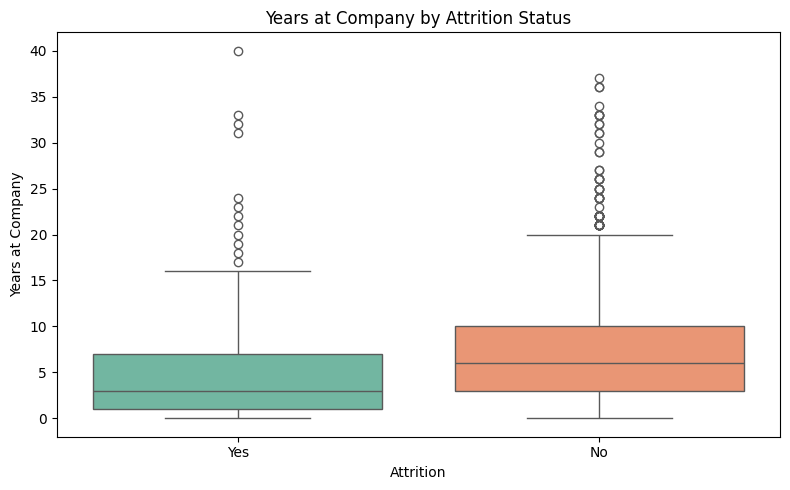

In [22]:
# Visualize Tenure Difference: Box Plot and Violin Plot
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Attrition', y='YearsAtCompany', hue='Attrition', palette='Set2')
plt.title('Years at Company by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.tight_layout()
plt.show()



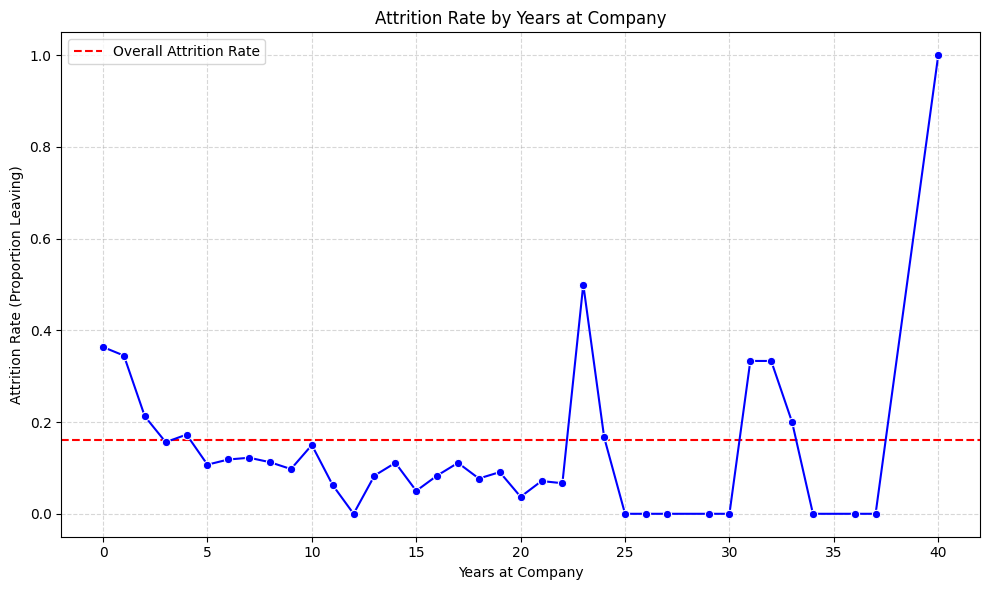

In [23]:
# Attrition Rate by Years at Company (Line Plot)
years = data['YearsAtCompany'].sort_values().unique()
attrition_rates = []
for year in years:
    total = len(data[data['YearsAtCompany'] == year])
    left = len(data[(data['YearsAtCompany'] == year) & (data['Attrition'] == 'Yes')])
    rate = left / total if total > 0 else 0
    attrition_rates.append(rate)
plt.figure(figsize=(10,6))
plt.axhline(y=data['Attrition'].value_counts(normalize=True).loc['Yes'], color='red', linestyle='--', label='Overall Attrition Rate')
sns.lineplot(x=years, y=attrition_rates, marker='o', color='blue')
plt.title('Attrition Rate by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Attrition Rate (Proportion Leaving)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

`Hypothesis 3`: Monthly income influences attrition.

In [25]:
# Test Hypothesis 3: Monthly income influences attrition
import scipy.stats as stats
income_no = data.loc[data['Attrition'] == 'No', 'MonthlyIncome']
income_yes = data.loc[data['Attrition'] == 'Yes', 'MonthlyIncome']
print('Mean Monthly Income (Stayed):', income_no.mean())
print('Mean Monthly Income (Left):', income_yes.mean())
print('--------------------------------')
# Independent t-test
income_t_stat, income_p_val = stats.ttest_ind(income_no, income_yes, equal_var=False)
print(f"\nT-test Results:")
print(f"t-statistic: {income_t_stat:.4f}")
print(f"p-value: {income_p_val:.4f}")
print("Interpretation:")
if income_p_val < 0.05:
    print("There is a statistically significant difference in monthly income between employees who stayed and those who left (p < 0.05).")
else:
    print("There is no statistically significant difference in monthly income between employees who stayed and those who left (p >= 0.05).")
print('--------------------------------')
print(f"This means, monthly income statistically influences attrition, t={income_t_stat:.2f}, p={income_p_val:.4f}")

Mean Monthly Income (Stayed): 6832.739659367397
Mean Monthly Income (Left): 4787.0928270042195
--------------------------------

T-test Results:
t-statistic: 7.4826
p-value: 0.0000
Interpretation:
There is a statistically significant difference in monthly income between employees who stayed and those who left (p < 0.05).
--------------------------------
This means, monthly income statistically influences attrition, t=7.48, p=0.0000


`Hypothesis 4`: Employees with more training are less likely to leave.

In [26]:
# Test Hypothesis 4: Employees with more training are less likely to leave

training_no = data.loc[data['Attrition'] == 'No', 'TrainingTimesLastYear']
training_yes = data.loc[data['Attrition'] == 'Yes', 'TrainingTimesLastYear']
print('Mean Training Times Last Year (Stayed):', training_no.mean())
print('Mean Training Times Last Year (Left):', training_yes.mean())
print('--------------------------------')
# Independent t-test
t_stat, p_val = stats.ttest_ind(training_no, training_yes, equal_var=False)
print(f"\nT-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")
print("Interpretation:")
if p_val < 0.05:
    print("There is a statistically significant difference in training times last year between employees who stayed and those who left (p < 0.05).")
else:
    print("There is no statistically significant difference in training times last year between employees who stayed and those who left (p >= 0.05).")
print('--------------------------------')
print(f"This means, employees with more training are statistically less likely to leave, t={t_stat:.2f}, p={p_val:.4f}")

Mean Training Times Last Year (Stayed): 2.8329278183292783
Mean Training Times Last Year (Left): 2.6244725738396624
--------------------------------

T-test Results:
t-statistic: 2.3305
p-value: 0.0204
Interpretation:
There is a statistically significant difference in training times last year between employees who stayed and those who left (p < 0.05).
--------------------------------
This means, employees with more training are statistically less likely to leave, t=2.33, p=0.0204


### Machine Learning Model to Predict Attrition 

In [7]:
# Machine Learning: RF, XGBoost with SMOTE (Safe Version)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Drop specified columns
drop_cols = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'EducationField', 'MonthlyRate']
data_ml = data.drop(columns=drop_cols)

# Map BusinessTravel
bt_map = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
data_ml['BusinessTravel'] = data_ml['BusinessTravel'].map(bt_map)

# Encode target
data_ml['Attrition'] = data_ml['Attrition'].map({'No': 0, 'Yes': 1})

# One-hot encode categorical variables (except target)
categorical_cols = data_ml.select_dtypes(include=['object']).columns
if 'Attrition' in categorical_cols:
    categorical_cols = categorical_cols.drop('Attrition')
data_ml = pd.get_dummies(data_ml, columns=categorical_cols, drop_first=True)

# Check for missing values
data_ml = data_ml.dropna()

# Split features and target
X = data_ml.drop('Attrition', axis=1)
y = data_ml['Attrition']

# Train/val/test split (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

results = {}

# Random Forest
try:
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_sm, y_train_sm)
    y_val_pred_rf = rf.predict(X_val)
    results['RF'] = accuracy_score(y_val, y_val_pred_rf)
    print('Random Forest Validation Accuracy:', results['RF'])
    print(classification_report(y_val, y_val_pred_rf))
except Exception as e:
    print('Random Forest error:', e)

# XGBoost
try:
    xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train_sm, y_train_sm)
    y_val_pred_xgb = xgb.predict(X_val)
    results['XGBoost'] = accuracy_score(y_val, y_val_pred_xgb)
    print('XGBoost Validation Accuracy:', results['XGBoost'])
    print(classification_report(y_val, y_val_pred_xgb))
except Exception as e:
    print('XGBoost error:', e)

# Best model selection
if results:
    best_model_name = max(results, key=results.get)
    print(f'Best model on validation: {best_model_name} with accuracy {results[best_model_name]:.4f}')
    # Test set evaluation
    if best_model_name == 'RF':
        y_test_pred = rf.predict(X_test)
    else:
        y_test_pred = xgb.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f'Test Accuracy for {best_model_name}: {test_acc:.4f}')
    print(classification_report(y_test, y_test_pred))
else:
    print('No model was successfully trained. Please check the above errors.')

Random Forest Validation Accuracy: 0.8090909090909091
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       185
           1       0.33      0.20      0.25        35

    accuracy                           0.81       220
   macro avg       0.60      0.56      0.57       220
weighted avg       0.78      0.81      0.79       220

XGBoost Validation Accuracy: 0.8363636363636363
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       185
           1       0.47      0.20      0.28        35

    accuracy                           0.84       220
   macro avg       0.67      0.58      0.59       220
weighted avg       0.80      0.84      0.81       220

Best model on validation: XGBoost with accuracy 0.8364
Test Accuracy for XGBoost: 0.8416
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       185
           1       0.52      0.39      0.44   

c:\Users\X1 User\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:24:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [10]:
# ===========================================================
# 1. Imports
# ===========================================================
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


# ===========================================================
# 2. Data Cleaning & Feature Engineering
# ===========================================================
drop_cols = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'EducationField', 'MonthlyRate']
data_ml = data.drop(columns=drop_cols).copy()

# Ordinal encode BusinessTravel
bt_map = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
data_ml['BusinessTravel'] = data_ml['BusinessTravel'].map(bt_map)

# Encode target
data_ml['Attrition'] = data_ml['Attrition'].map({'No': 0, 'Yes': 1})

# Identify categorical variables
categorical_cols = data_ml.select_dtypes(include=['object']).columns.tolist()

# Remove target if mistakenly inside categorical list
categorical_cols = [c for c in categorical_cols if c != 'Attrition']

numeric_cols = data_ml.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ['Attrition']]

# Drop missing values
data_ml = data_ml.dropna()

# Features & target
X = data_ml.drop('Attrition', axis=1)
y = data_ml['Attrition']


# ===========================================================
# 3. Train / Validation / Test Splits (no leakage)
# ===========================================================
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)


# ===========================================================
# 4. Preprocessing Pipelines
# ===========================================================
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)


# ===========================================================
# 5. Define Optuna Objective Function
# ===========================================================
def objective(trial):

    model_choice = trial.suggest_categorical("model", ["RF", "XGB"])

    # SMOTE parameters (optional)
    smote_k = trial.suggest_int("smote_k", 2, 10)

    if model_choice == "RF":
        n_estimators = trial.suggest_int("rf_n_estimators", 100, 400)
        max_depth = trial.suggest_int("rf_max_depth", 3, 20)
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42
        )

    elif model_choice == "XGB":
        n_estimators = trial.suggest_int("xgb_n_estimators", 100, 400)
        max_depth = trial.suggest_int("xgb_max_depth", 2, 15)
        learning_rate = trial.suggest_loguniform("xgb_lr", 1e-3, 0.3)
        model = XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            eval_metric='logloss',
            random_state=42,
            use_label_encoder=False
        )

    # Full pipeline: Preprocessing → SMOTE → Model
    pipeline = ImbPipeline(steps=[
        ("preprocess", preprocessor),
        ("smote", SMOTE(k_neighbors=smote_k, random_state=42)),
        ("model", model)
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(
        pipeline, X_train, y_train, cv=cv,
        scoring="roc_auc", n_jobs=-1
    )

    return scores.mean()


# ===========================================================
# 6. Run Optuna Hyperparameter Search
# ===========================================================
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40)

print("Best Trial:", study.best_trial.params)
print("Best CV ROC-AUC:", study.best_value)


# ===========================================================
# 7. Train Final Model Using Best Params
# ===========================================================
params = study.best_trial.params

if params["model"] == "RF":
    final_model = RandomForestClassifier(
        n_estimators=params["rf_n_estimators"],
        max_depth=params["rf_max_depth"],
        random_state=42
    )
else:
    final_model = XGBClassifier(
        n_estimators=params["xgb_n_estimators"],
        max_depth=params["xgb_max_depth"],
        learning_rate=params["xgb_lr"],
        eval_metric="logloss",
        random_state=42,
        use_label_encoder=False
    )

final_pipeline = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(k_neighbors=params["smote_k"], random_state=42)),
    ("model", final_model)
])

final_pipeline.fit(X_train, y_train)


# ===========================================================
# 8. Validation & Test Performance
# ===========================================================
y_val_pred = final_pipeline.predict(X_val)
y_test_pred = final_pipeline.predict(X_test)

print("\nValidation ROC-AUC:", roc_auc_score(y_val, final_pipeline.predict_proba(X_val)[:,1]))
print("Test ROC-AUC:", roc_auc_score(y_test, final_pipeline.predict_proba(X_test)[:,1]))

print("\nValidation Report:\n", classification_report(y_val, y_val_pred))
print("Test Report:\n", classification_report(y_test, y_test_pred))


[I 2025-12-10 15:33:03,242] A new study created in memory with name: no-name-c0846f05-68a5-4841-b6d8-c25979b84342
C:\Users\X1 User\AppData\Local\Temp\ipykernel_17044\1325796959.py:97: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("xgb_lr", 1e-3, 0.3)
C:\Users\X1 User\AppData\Local\Temp\ipykernel_17044\1325796959.py:97: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("xgb_lr", 1e-3, 0.3)
[I 2025-12-10 15:33:09,132] Trial 0 finished with value: 0.8031519699497685 and parameters: {'model': 'XGB', 'smote_k': 9, 'xgb_n_estimators': 360, 'xgb_max_depth': 7, 'xgb_lr': 0.037329437028313026}. Best is

Best Trial: {'model': 'XGB', 'smote_k': 2, 'xgb_n_estimators': 210, 'xgb_max_depth': 2, 'xgb_lr': 0.06466451944198073}
Best CV ROC-AUC: 0.8321757783268264

Validation ROC-AUC: 0.7525868725868725
Test ROC-AUC: 0.8120120120120121

Validation Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       185
           1       0.47      0.23      0.31        35

    accuracy                           0.84       220
   macro avg       0.67      0.59      0.61       220
weighted avg       0.80      0.84      0.81       220

Test Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       185
           1       0.70      0.39      0.50        36

    accuracy                           0.87       221
   macro avg       0.80      0.68      0.71       221
weighted avg       0.86      0.87      0.86       221


Validation ROC-AUC: 0.7525868725868725
Test ROC-AUC: 0.8120120120120121

Validatio

c:\Users\X1 User\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:33:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [11]:
final_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'BusinessTravel',
                                                   'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'Standar...
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.06466451944198073, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=2,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=210,
                               n_jobs=None, num_parallel_tree=None, ...))])

### SHAP Analysis: Model Interpretability

We use SHAP (SHapley Additive exPlanations) to interpret the predictions of our final pipeline. SHAP helps us understand which features most influence the model's decision for employee attrition.

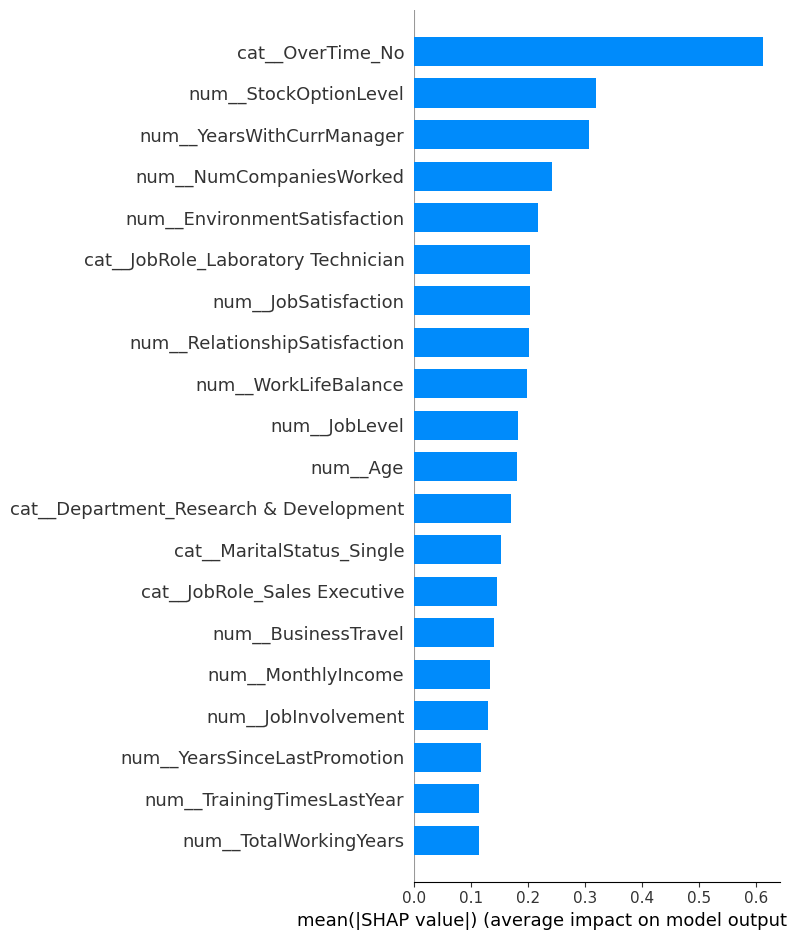

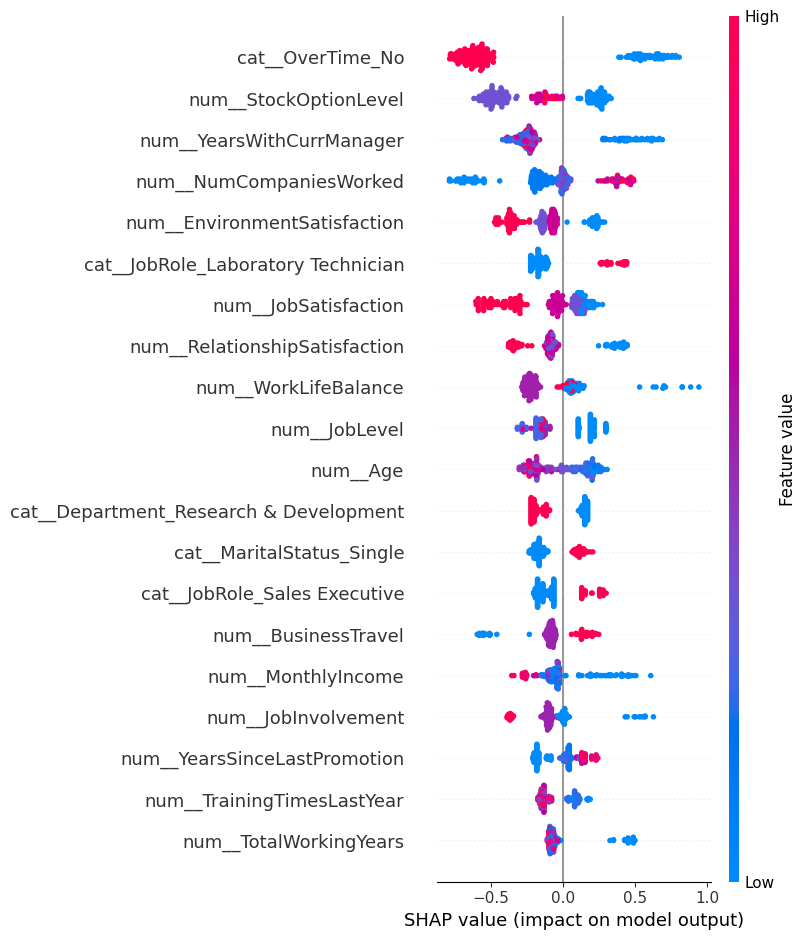

In [12]:
# SHAP Analysis for Final Model
import shap
import matplotlib.pyplot as plt

# Get the model from the pipeline
model = final_pipeline.named_steps['model']

# Preprocess validation data for SHAP (no SMOTE, just transformation)
X_val_transformed = final_pipeline.named_steps['preprocess'].transform(X_val)

# SHAP explainer selection
if hasattr(model, 'predict_proba') and hasattr(model, 'feature_importances_'):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_val_transformed)
    feature_names = final_pipeline.named_steps['preprocess'].get_feature_names_out()
    shap.summary_plot(shap_values, X_val_transformed, feature_names=feature_names, plot_type='bar')
    plt.show()
    shap.summary_plot(shap_values, X_val_transformed, feature_names=feature_names)
    plt.show()
else:
    print('SHAP analysis is only supported for tree-based models (RandomForest, XGBoost) in this pipeline.')

### Causal Impact Estimation (Not Direct Measurement)

#### Step 1: Causal Impact Estimation (Propensity Score Matching)

To estimate the effect of interventions (e.g., training, reducing overtime) on attrition risk, we use propensity score matching. This approach matches at-risk employees with similar 'stayers' to identify protective factors and estimate the impact of potential interventions.

**Process:**
1. Find 'similar' employees who did NOT leave (matched on JobRole, Age, Satisfaction, Income, etc.).
2. Identify protective factors present in stayers but absent in at-risk employees.
3. Estimate the change in attrition probability if interventions are applied.

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

#############################################
# 1. FEATURE PREPARATION
#############################################

# Choose matching features
psm_features = [
    'Age', 
    'JobSatisfaction', 
    'MonthlyIncome', 
    'OverTime', 
    'TrainingTimesLastYear'
]

df = data.copy()

# Encode OverTime
df['OverTime'] = df['OverTime'].map({'No': 0, 'Yes': 1})

# One-hot encode JobRole
df = pd.get_dummies(df, columns=['JobRole'], drop_first=True)
jobrole_cols = [c for c in df.columns if c.startswith("JobRole_")]

# Target encoding (1 = attrition)
df['Attrition_flag'] = (df['Attrition'] == 'Yes').astype(int)

# Combine features
X = df[psm_features + jobrole_cols]
y = df['Attrition_flag']

#############################################
# 2. PROPENSITY SCORE MODEL
#############################################

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

psm_model = LogisticRegression(max_iter=2000)
psm_model.fit(X_scaled, y)
df['propensity_score'] = psm_model.predict_proba(X_scaled)[:, 1]

#############################################
# 3. SPLIT DATA INTO RISK & CONTROL
#############################################

at_risk = df[df['Attrition_flag'] == 1].copy()
stayers = df[df['Attrition_flag'] == 0].copy()

#############################################
# 4. MATCHING USING NEAREST NEIGHBOR + CALIPER
#############################################

# Fit NN on stayer propensity scores
nbrs = NearestNeighbors(n_neighbors=1).fit(stayers[['propensity_score']])

distances, indices = nbrs.kneighbors(at_risk[['propensity_score']])

# Add caliper: drop matches where distance > threshold
caliper = 0.03
valid_matches = distances.flatten() < caliper

at_risk = at_risk[valid_matches]
indices = indices[valid_matches]

#############################################
# 5. INTERVENTION + COUNTERFACTUAL ENGINE
#############################################

def estimate_counterfactual_prob(row, interventions):
    """
    Modify features based on interventions and recompute attrition probability.
    """
    modified_row = row.copy()
    for feat, value in interventions.items():
        modified_row[feat] = value

    x_new = modified_row[psm_features + jobrole_cols].values.astype(float)
    x_new_scaled = scaler.transform([x_new])
    return psm_model.predict_proba(x_new_scaled)[0, 1]

recommendations = []

for i, idx_at_risk in enumerate(at_risk.index):
    idx_stayer = stayers.index[indices[i][0]]

    r = at_risk.loc[idx_at_risk]
    s = stayers.loc[idx_stayer]

    #                                 #
    # 5A. Identify suggested actions  #
    #                                 #
    interventions = {}

    if r['OverTime'] == 1 and s['OverTime'] == 0:
        interventions['OverTime'] = 0
    if r['TrainingTimesLastYear'] < s['TrainingTimesLastYear']:
        interventions['TrainingTimesLastYear'] = s['TrainingTimesLastYear']
    if r['JobSatisfaction'] < s['JobSatisfaction']:
        interventions['JobSatisfaction'] = s['JobSatisfaction']

    # If no interventions, skip
    if not interventions:
        continue

    #                                               #
    # 5B. Compute counterfactual attrition impact    #
    #                                               #
    original_prob = r['propensity_score']
    new_prob = estimate_counterfactual_prob(r, interventions)
    improvement = original_prob - new_prob

    recommendations.append({
        "at_risk_index": idx_at_risk,
        "matched_stayer": idx_stayer,
        "original_attrition_prob": original_prob,
        "new_attrition_prob": new_prob,
        "expected_reduction": improvement,
        "suggested_interventions": interventions
    })

#############################################
# 6. VIEW RESULTS
#############################################

for rec in recommendations[:5]:
    print(f"\nAt-Risk Employee {rec['at_risk_index']}")
    print(f"Matched Stayer: {rec['matched_stayer']}")
    print(f"Original Attrition Probability: {rec['original_attrition_prob']:.3f}")
    print(f"Counterfactual Probability After Interventions: {rec['new_attrition_prob']:.3f}")
    print(f"Expected Improvement: {rec['expected_reduction']:.3f}")
    print("Interventions:", rec['suggested_interventions'])
    print("---------------------------------------------------")



At-Risk Employee 0
Matched Stayer: 1168
Original Attrition Probability: 0.306
Counterfactual Probability After Interventions: 0.248
Expected Improvement: 0.057
Interventions: {'TrainingTimesLastYear': np.int64(2)}
---------------------------------------------------

At-Risk Employee 2
Matched Stayer: 139
Original Attrition Probability: 0.406
Counterfactual Probability After Interventions: 0.334
Expected Improvement: 0.072
Interventions: {'JobSatisfaction': np.int64(4)}
---------------------------------------------------

At-Risk Employee 21
Matched Stayer: 1267
Original Attrition Probability: 0.330
Counterfactual Probability After Interventions: 0.210
Expected Improvement: 0.120
Interventions: {'JobSatisfaction': np.int64(3)}
---------------------------------------------------

At-Risk Employee 26
Matched Stayer: 1315
Original Attrition Probability: 0.352
Counterfactual Probability After Interventions: 0.285
Expected Improvement: 0.067
Interventions: {'JobSatisfaction': np.int64(2)}
-

c:\Users\X1 User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\X1 User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\X1 User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\X1 User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\X1 User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.

#### Step 2: Intervention Recommendation Engine

For each high-risk employee:
1. Identify top 3 attrition drivers using SHAP values (feature importance for that individual).
2. Map each driver to a recommended intervention from a predefined library (e.g., Overtime → Flexible hours, Low satisfaction → Career path discussion).
3. Calculate an "ease-impact" matrix to prioritize interventions (High Impact & Low Effort = PRIORITIZE).

**Monetary Impact Estimation:**
- Use the `MonthlyIncome` column to estimate the cost of attrition (e.g., replacement cost = 6x monthly income).
- Estimate the number of attritions prevented by interventions (using predicted probability reduction).
- Calculate total savings: (attritions prevented) × (replacement cost per employee).

In [23]:
# Step 2: SHAP-based Intervention Engine with Monetary Impact (Improved)

import shap
import numpy as np

model = final_pipeline.named_steps['model']
X_val_transformed = final_pipeline.named_steps['preprocess'].transform(X_val)
feature_names = final_pipeline.named_steps['preprocess'].get_feature_names_out()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val_transformed)

def extract_base_feature(feat_name):
    if feat_name.startswith("num__"):
        return feat_name.replace("num__", "")
    if feat_name.startswith("cat__"):
        return feat_name.replace("cat__", "").split('_')[0]
    return feat_name

def estimated_prob_reduction(p, sv):
    log_odds = np.log(p / (1 - p))
    new_log_odds = log_odds - sv
    new_p = 1 / (1 + np.exp(-new_log_odds))
    return max(p - new_p, 0)

intervention_library = {
    'OverTime': ['Flexible hours', 'Workload redistribution'],
    'JobSatisfaction': ['Career path discussion', 'Mentor assignment'],
    'StockOptionLevel': ['Equity review', 'Bonus structure'],
    'MonthlyIncome': ['Compensation review'],
    'TrainingTimesLastYear': ['Increase training opportunities'],
}

pred_probs = final_pipeline.predict_proba(X_val)[:,1]
high_risk_indices = np.where(pred_probs > 0.5)[0]

recommendations = []

for idx in high_risk_indices[:5]:

    # shap_values already shape (n_samples, n_features)
    shap_impacts = shap_values[idx]              # <-- FIXED LINE

    top_idx = np.argsort(-np.abs(shap_impacts))[:3]

    top_features = feature_names[top_idx]
    top_impacts = shap_impacts[top_idx]

    mapped = []
    for f in top_features:
        base = extract_base_feature(f)
        if base in intervention_library:
            mapped.extend(intervention_library[base])

    monthly_income = X_val.iloc[idx].get('MonthlyIncome', np.nan)
    replacement_cost = 1.2 * 12 * monthly_income if not np.isnan(monthly_income) else None

    prob_reductions = [
        estimated_prob_reduction(pred_probs[idx], sv) for sv in top_impacts
    ]

    total_prob_reduction = min(sum(prob_reductions), pred_probs[idx])
    expected_savings = total_prob_reduction * replacement_cost if replacement_cost else None

    recommendations.append({
        'employee_idx': idx,
        'drivers': list(zip(top_features, top_impacts)),
        'interventions': mapped,
        'original_prob': pred_probs[idx],
        'prob_reduction_est': total_prob_reduction,
        'replacement_cost_est': replacement_cost,
        'expected_savings': expected_savings,
    })

for rec in recommendations:
    print(f"\nEmployee Index: {rec['employee_idx']}")
    print(f"Original Attrition Probability: {rec['original_prob']:.3f}")
    print("Top Drivers and SHAP Impacts:")
    for feat, impact in rec['drivers']:
        print(f"  {feat}: {impact:.4f}")
    print("Suggested Interventions:", rec['interventions'])
    print(f"Estimated Probability Reduction: {rec['prob_reduction_est']:.3f}")
    if rec['replacement_cost_est']:
        print(f"Estimated Replacement Cost: ${rec['replacement_cost_est']:.2f}")
        print(f"Expected Savings from Intervention: ${rec['expected_savings']:.2f}")
    print("---------------------------------------------------")


# print total expected savings across all recommendations
total_savings = sum(rec['expected_savings'] for rec in recommendations if rec['expected_savings'])
print(f"\nTotal Expected Savings from Interventions: ${total_savings:.2f}")


Employee Index: 2
Original Attrition Probability: 0.546
Top Drivers and SHAP Impacts:
  num__WorkLifeBalance: 0.6931
  cat__OverTime_No: -0.4809
  cat__JobRole_Sales Executive: 0.2793
Suggested Interventions: ['Flexible hours', 'Workload redistribution']
Estimated Probability Reduction: 0.240
Estimated Replacement Cost: $79300.80
Expected Savings from Intervention: $19043.65
---------------------------------------------------

Employee Index: 26
Original Attrition Probability: 0.718
Top Drivers and SHAP Impacts:
  cat__OverTime_No: 0.6678
  num__RelationshipSatisfaction: 0.4082
  num__StockOptionLevel: 0.2883
Suggested Interventions: ['Flexible hours', 'Workload redistribution', 'Equity review', 'Bonus structure']
Estimated Probability Reduction: 0.303
Estimated Replacement Cost: $48211.20
Expected Savings from Intervention: $14602.93
---------------------------------------------------

Employee Index: 82
Original Attrition Probability: 0.634
Top Drivers and SHAP Impacts:
  cat__OverT